# Prepare data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from preparation import prepare_data, select_by_date_interval
from plotting import h_bar_plot, get_videos_per_h, month_bar_plot, get_videos_per_month

In [2]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger
style.use('seaborn') # apply style for your plot. Hard to read letters in pie charts if style isn't suitable

In [3]:
PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)

# start_date = "2022-08-01"
# end_date = "2022-09-30"
# df = select_by_date_interval(df0, start=start_date)
df

,video_title,channel_name,time
0,That's The Way It Is,Daniel Lanois - Topic,2022-09-06 08:00:07.521000+03:00
1,Lone Digger,Caravan Palace - Topic,2022-09-06 07:44:49.290000+03:00
2,The Battle for Kherson is a 'Systematic Grinding',Jake Broe,2022-09-06 07:31:22.101000+03:00
3,Ukraine Launches MASSIVE Counter Attack Agains...,Speak The Truth,2022-09-06 07:19:49.595000+03:00
4,"Learn English Grammar: NOUN, VERB, ADVERB, ADJ...",English with Ronnie · EnglishLessons4U with en...,2022-09-06 07:19:39.586000+03:00
...,...,...,...
6288,We Are Number One - Lazy Town [Saxophone Cover],Daniele Vitale Sax,2022-04-06 13:40:30.876000+03:00
6289,Учасники «Чорнобаївського серіалу» боронять Ми...,АрміяInform,2022-04-06 13:33:50.430000+03:00
6290,Звірства росіян у Бородянці. Катування мирних ...,STERNENKO,2022-04-06 13:03:25.129000+03:00
6291,"ЧОМУ НЕ БУВАЄ ""ХАРОШИХ РУССКИХ""?",Загін Кіноманів,2022-04-06 12:36:08.058000+03:00


# Count on how many videos you clicked per channel

In [4]:
counts = df["channel_name"].value_counts()
counts

STERNENKO                          233
Eurovision Song Contest            205
Viva La Dirt League                100
Adam Something                      90
Beau of the Fifth Column            76
                                  ... 
Conquest Reimagined                  1
Better Data Science                  1
Ніна - Україна / Nina - Ukraine      1
Elias MC🚀                            1
АрміяInform                          1
Name: channel_name, Length: 1505, dtype: Int64

# Break into categories

In [5]:
bins = [0, 1, 5, 10, 20, 50, np.inf]
names = ['1', '2-5', '6-10', '11-20', '21-50', ">50"]

intervals = pd.cut(counts, bins, labels=names)

df2 = pd.DataFrame({"video_count": counts, "interval": intervals})
df2

,video_count,interval
STERNENKO,233,>50
Eurovision Song Contest,205,>50
Viva La Dirt League,100,>50
Adam Something,90,>50
Beau of the Fifth Column,76,>50
...,...,...
Conquest Reimagined,1,1
Better Data Science,1,1
Ніна - Україна / Nina - Ukraine,1,1
Elias MC🚀,1,1


# Plot percentage of categories

In [6]:
interval_count = df2["interval"].value_counts()
percentage = interval_count/len(df2)
percentage

1        0.635216
2-5      0.231229
6-10     0.052492
21-50    0.036545
11-20    0.035880
>50      0.008638
Name: interval, dtype: float64

<AxesSubplot:ylabel='interval'>

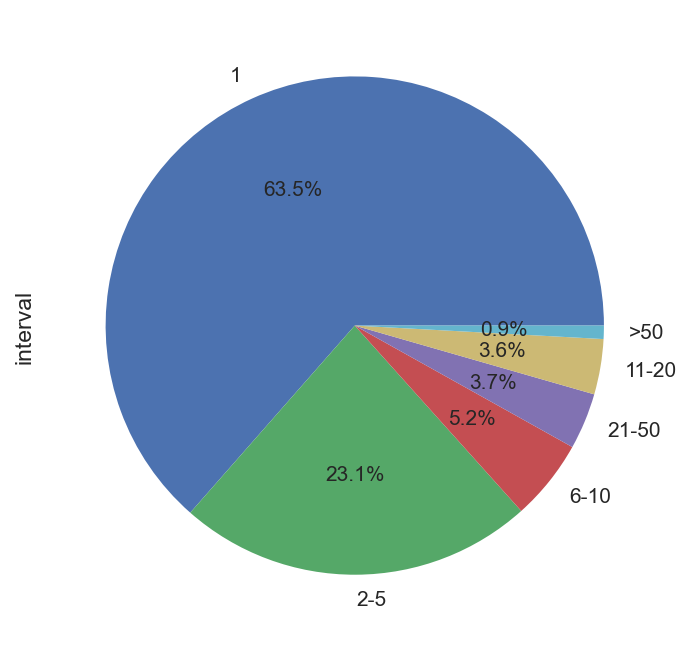

In [7]:
percentage.plot.pie(autopct='%1.1f%%')

# Plot n most watched channels

1756

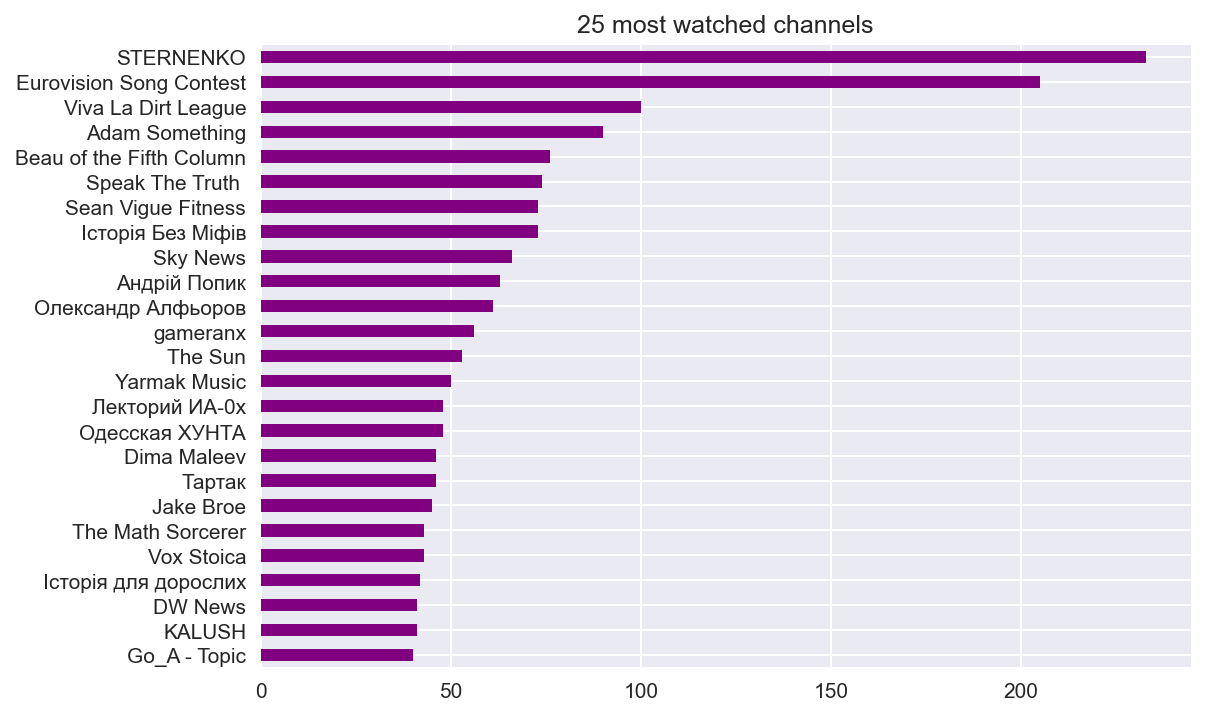

In [8]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()
sum(top_n_channels)

# Count on how many videos you clicked per hour

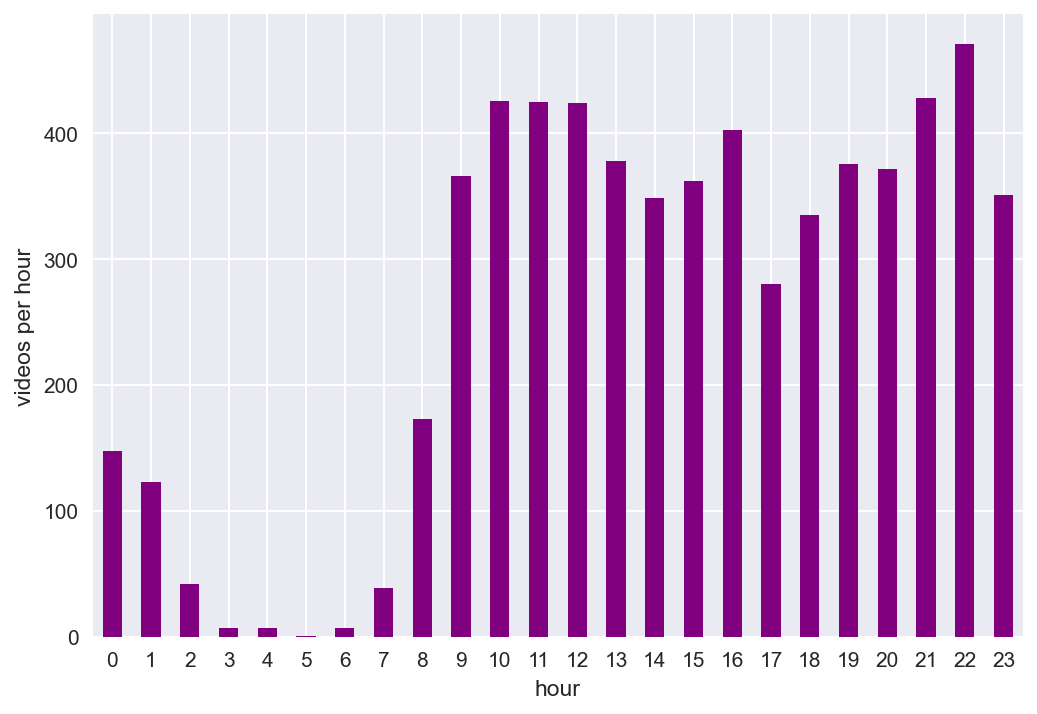

In [9]:
h_bar_plot(df)

# Discover at what hours you watch a particular channel 

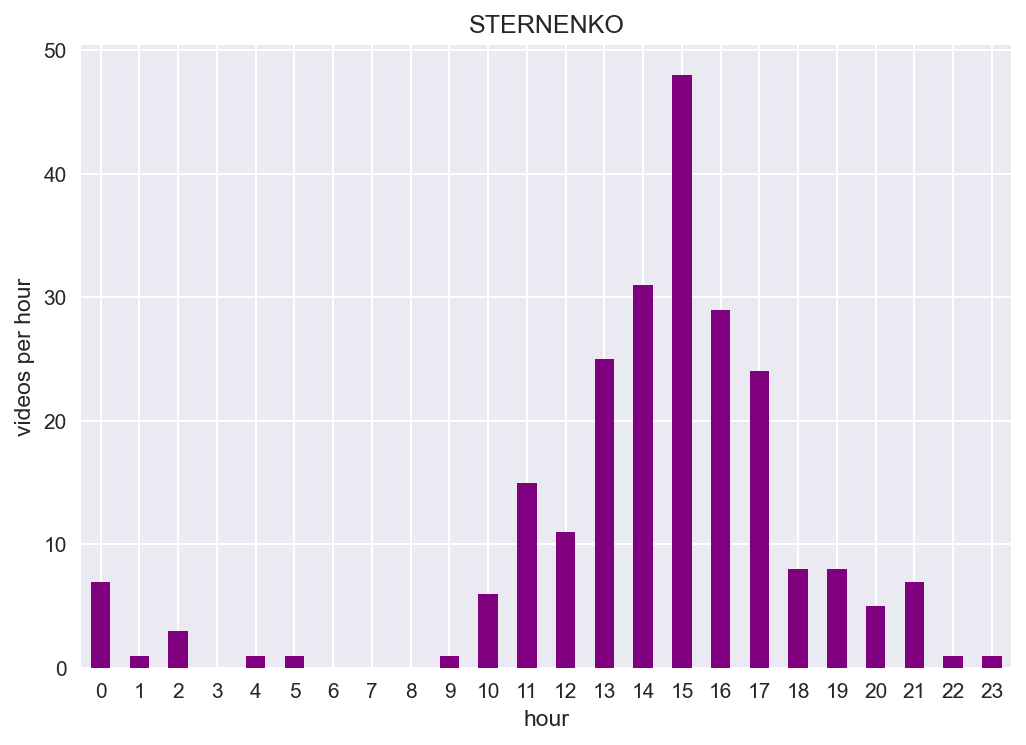

In [10]:
channel_name_to_look = "STERNENKO"
h_bar_plot(df, channel_name_to_look)

# Plot videos count per hour for several channels

In [11]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels[:10]

['STERNENKO',
 'Eurovision Song Contest',
 'Viva La Dirt League',
 'Adam Something',
 'Beau of the Fifth Column',
 'Speak The Truth ',
 'Sean Vigue Fitness',
 'Історія Без Міфів',
 'Sky News',
 'Андрій Попик']

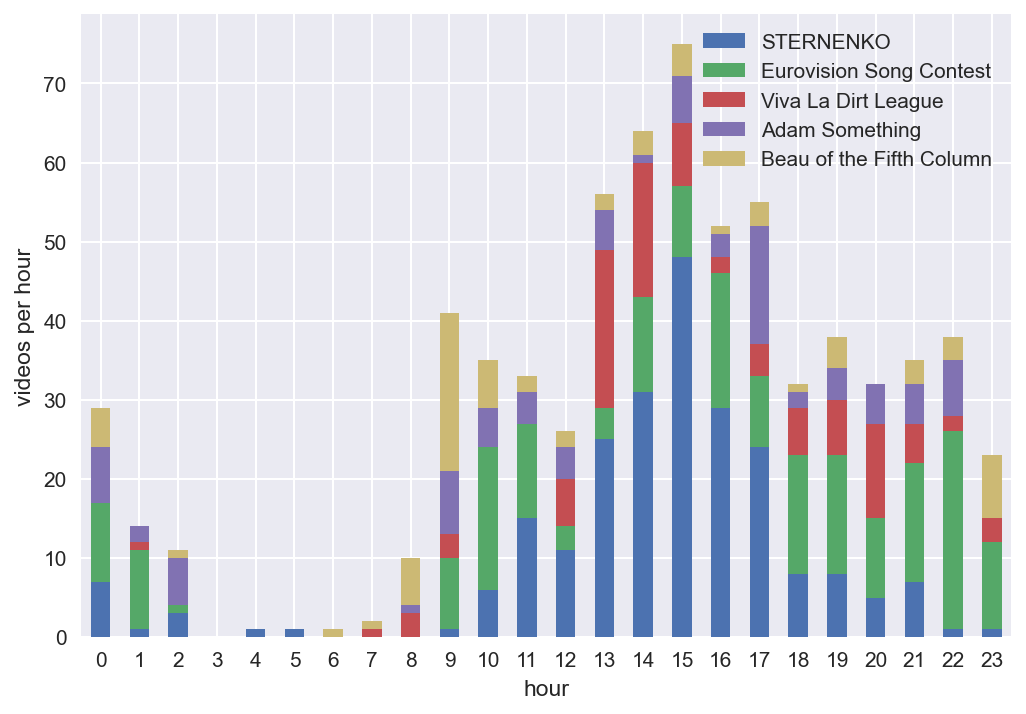

In [12]:
start_point = 0
interval = 5
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

# Count how many videos you click per day of week

<AxesSubplot:>

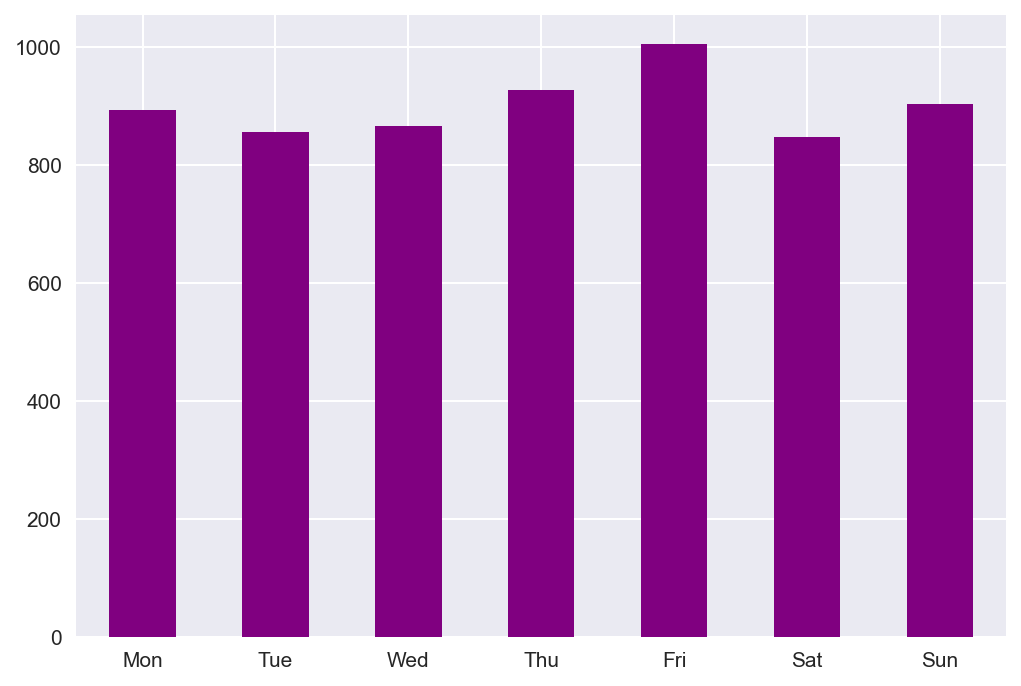

In [13]:
df['weekday'] = df['time'].dt.strftime('%a')
total = len(df["weekday"])
str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
videos_per_weekday = df["weekday"].value_counts()[str_week_days] # sort with custom index
videos_per_weekday.plot.bar(color="purple", rot=0)

# Change in use of a particular channel over months (Use all data for this!)

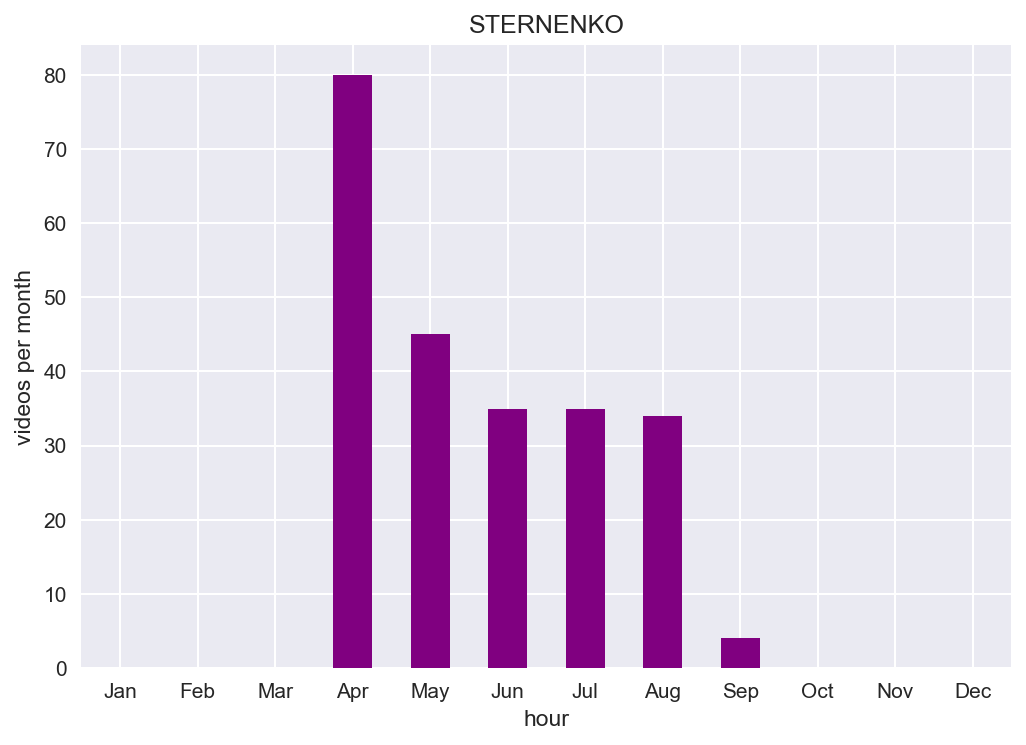

In [23]:
channel_name = "STERNENKO"
month_bar_plot(df, channel_name)